In [1]:
!pip install tensorflow opencv-python matplotlib

In [3]:
import tensorflow as tf
#os used to navigate through file structure
import os

In [59]:
# gpus will tell no. of gpus is been used
gpus = tf.config.experimental.list_physical_devices('GPU')
# list the use of gpu as much req. Avoid OOM errors
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Load data using keras

In [2]:
import cv2
# img hdr used to check file extension
import imghdr

In [5]:
# define data directory with constant
data_dir='data'

In [6]:
image_exts= ['jpeg','jpg','bmp','png']

In [64]:
for image_class in os.listdir(data_dir): #go inside data_dir and get happy and sad
    for image in os.listdir(os.path.join(data_dir, image_class)): # looping every single image in that dir.
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path) # getting image extension
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))

In [65]:
tf.data.Dataset??

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [82]:
data = tf.keras.utils.image_dataset_from_directory('data') # automatic create dataset of content in it

Found 305 files belonging to 2 classes.


now data is data set which is preloaded into memory
now we can't get data directly with its index (ex. data[0])

now to grab the data we will convert it to numpy

In [83]:
data_iterator = data.as_numpy_iterator() # allowing to loop through it

In [84]:
batch = data_iterator.next() # grabbing next batch of data by iterating

In [38]:
len(batch)

2

batch has 2 part, first part (batch[0])  contains images representation
and second (batch[1]) contains labels

In [67]:
#image represented as numpy array
batch[0]

array([[[[0.99215686, 0.6627451 , 0.03198529],
         [0.99791664, 0.66066176, 0.02928922],
         [0.99607843, 0.65882355, 0.02745098],
         ...,
         [0.99215686, 0.6627451 , 0.03529412],
         [0.9963235 , 0.66066176, 0.03345588],
         [0.9987745 , 0.6627451 , 0.03198529]],

        [[0.99215686, 0.6627451 , 0.03198529],
         [0.99607843, 0.65882355, 0.02745098],
         [0.99607843, 0.65882355, 0.02745098],
         ...,
         [0.99215686, 0.6627451 , 0.03529412],
         [0.9963235 , 0.66066176, 0.03345588],
         [0.9987745 , 0.6627451 , 0.03198529]],

        [[0.9987745 , 0.6627451 , 0.03198529],
         [0.99240196, 0.65882355, 0.02745098],
         [0.99607843, 0.65882355, 0.02745098],
         ...,
         [0.99215686, 0.6627451 , 0.03529412],
         [0.9963235 , 0.66066176, 0.03345588],
         [0.9987745 , 0.6627451 , 0.03198529]],

        ...,

        [[0.9987745 , 0.6627451 , 0.03198529],
         [0.9963235 , 0.66066176, 0.03345588]

In [15]:
batch[1]

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

0 - happy image
1- sad image

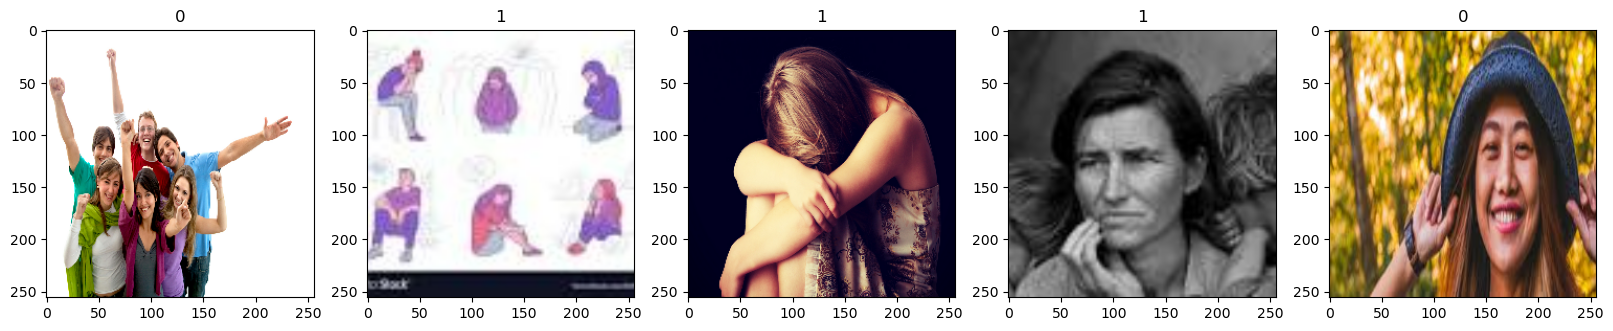

In [89]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing Data

as img min value is 0 and max is 255. 
so we what max value as small as so this will optimize it to faster.
so we will scale it by divide value by 255.
Now max will be 1.

In [85]:
#scale data
data = data.map(lambda x,y:(x/255 , y))  # data.map will allow transformation in pipeline
 # lambda function will able to go and do transformation
    # so go through batch where
# x represent image and y represent labels

In [86]:
scaled_ite = data.as_numpy_iterator()

In [87]:
batch = scaled_ite.next()

In [88]:
batch[0].max()

1.0

In [46]:
len(data)

10

so there is 10 batchs of data

In [90]:
train_size = int(len(data)*.7) #training data= data used to train DL model
val_size = int(len(data)*.2) # validation data = evaluate our model while training
test_size = int(len(data)*.1) # test partition =  this is used to post training to do evalution


In [53]:
train_size+val_size+test_size

10

In [91]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Building DL model

In [92]:
from tensorflow.keras.models import Sequential  #sequential is modal buliding API
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# convo2d - its is CNN 
# maxpooling2d - act as condensing layer(goes to image and condense it)

In [93]:
model = Sequential()

In [94]:
#convolution has 16 filters of 3,3 pixel and stride of 1 (move 1 px each time) and activation type
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [95]:
# we are using adam optimizer
model.compile('adam', loss= tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

# Train

In [97]:
logdir='logs'

In [100]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [102]:
# two important method to build neural network
# fit - it is training component
# predict - when we actually go and make predictions
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

#epochs- how long we go and train for

Epoch 1/20
7/7 [==============================] - 11s 1s/step - loss: 1.4307 - accuracy: 0.4911 - val_loss: 0.6772 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.6664 - accuracy: 0.6116 - val_loss: 0.6510 - val_accuracy: 0.6406
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.6625 - accuracy: 0.6429 - val_loss: 0.6290 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.5607 - accuracy: 0.7768 - val_loss: 0.5272 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.4609 - accuracy: 0.7768 - val_loss: 0.3881 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.3669 - accuracy: 0.8839 - val_loss: 0.3121 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.2731 - accuracy: 0.9152 - val_loss: 0.1824 - val_accuracy: 0.9688
Epoch 8/20
7/7 [=====================

In [104]:
hist.history

{'loss': [1.4307472705841064,
  0.6663759350776672,
  0.6625434756278992,
  0.5606527328491211,
  0.46092405915260315,
  0.36685803532600403,
  0.27310097217559814,
  0.20253990590572357,
  0.17692753672599792,
  0.11155874282121658,
  0.05764719098806381,
  0.02923891879618168,
  0.02979344315826893,
  0.01914503611624241,
  0.007995424792170525,
  0.011808102019131184,
  0.014639511704444885,
  0.016469672322273254,
  0.01594509370625019,
  0.012678423896431923],
 'accuracy': [0.4910714328289032,
  0.6116071343421936,
  0.6428571343421936,
  0.7767857313156128,
  0.7767857313156128,
  0.8839285969734192,
  0.9151785969734192,
  0.9508928656578064,
  0.9330357313156128,
  0.9910714030265808,
  0.9910714030265808,
  0.9955357313156128,
  0.9910714030265808,
  0.9955357313156128,
  1.0,
  1.0,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128],
 'val_loss': [0.6772048473358154,
  0.6509754657745361,
  0.6289654970169067,
  0.5272465348243713,
  0.388

Plot

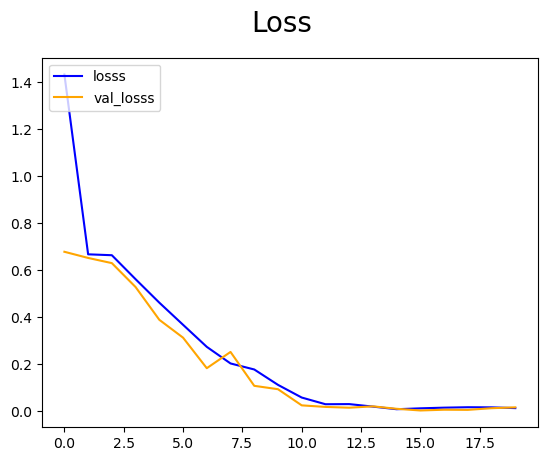

In [109]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='losss')
plt.plot(hist.history['val_loss'], color='orange', label='val_losss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

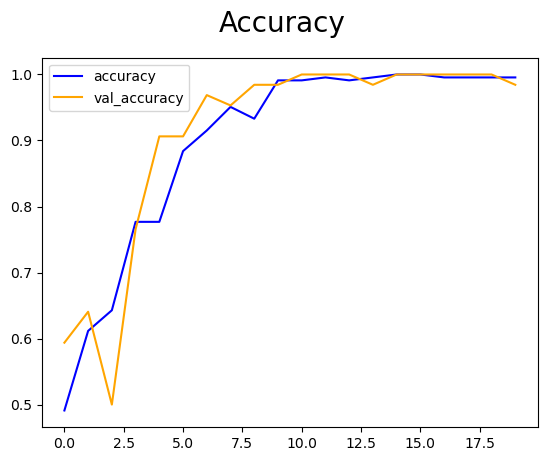

In [110]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate


In [111]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [112]:
pre = Precision()
re = Recall()
acc= BinaryAccuracy()

In [113]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 220ms/step


In [117]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


# Testing

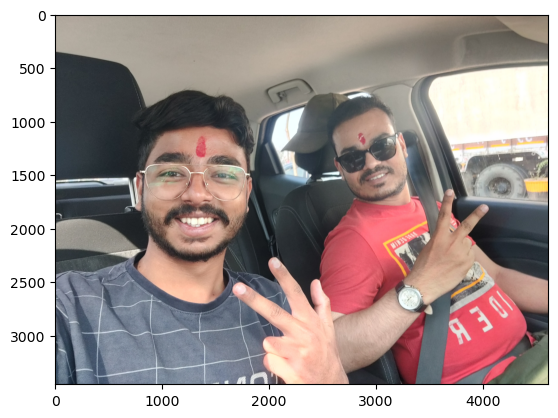

In [148]:
img = cv2.imread('image1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

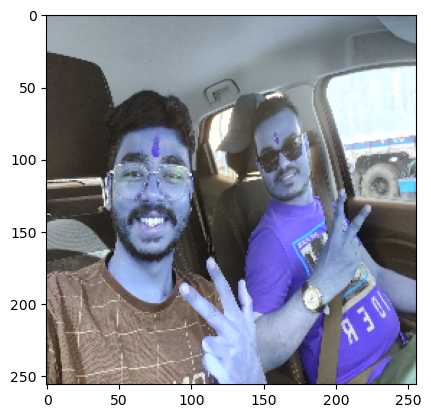

In [149]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [150]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [151]:
yhat

array([[0.02860614]], dtype=float32)

In [152]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# SAVE model to use in future as API or other

in form of h5

In [153]:
from tensorflow.keras.models import load_model

In [156]:
model.save(os.path.join('models','HappySadModel.h5'))

In [158]:
new_model = load_model(os.path.join('models','HappySadModel.h5'))

In [159]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 65ms/step


array([[0.02860614]], dtype=float32)